In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import os
import datetime
import re
import sys
BASEPATH = '/home/dan/Projects/kaggle-ieee-cis-fraud-detection/'
sys.path.insert(0,os.path.join(BASEPATH, 'src/'))

import pandas as pd
import numpy as np
from tqdm import tqdm

import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from load import BaseDataLoader
from preprocessing import Preprocessor
from constants import THIRD_NAN_GROUP
from utils import reduce_mem_usage

In [4]:
if not os.path.isfile(os.path.join(BASEPATH, 'tmp/train.pkl')):
    data = BaseDataLoader(os.path.join(BASEPATH, 'data/')).files
    train_transaction = data['train_transaction']
    train_identity = data['train_identity']
    test_transaction = data['test_transaction']
    test_identity = data['test_identity']
    train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
    test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
    train.to_pickle(os.path.join(BASEPATH, 'tmp/train.pkl'))
    test.to_pickle(os.path.join(BASEPATH, 'tmp/test.pkl'))

In [5]:
train = pd.read_pickle(os.path.join(BASEPATH, 'tmp/train.pkl'))
test = pd.read_pickle(os.path.join(BASEPATH, 'tmp/test.pkl'))

In [6]:
preprocessor = Preprocessor()

In [7]:
train = Preprocessor.remove_nan(train)
test = Preprocessor.remove_nan(test)

In [8]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Memory usage of properties dataframe is: 1996.4831352233887MB
Previous type of column TransactionID props[col].dtype
New type of column TransactionID uint32
Previous type of column isFraud props[col].dtype
New type of column isFraud int8
Previous type of column TransactionDT props[col].dtype
New type of column TransactionDT uint32
Previous type of column TransactionAmt props[col].dtype
New type of column TransactionAmt float32
Previous type of column card1 props[col].dtype
New type of column card1 uint16
Previous type of column card2 props[col].dtype
New type of column card2 int16
Previous type of column card3 props[col].dtype
New type of column card3 int16
Previous type of column card5 props[col].dtype
New type of column card5 int16
Previous type of column addr1 props[col].dtype
New type of column addr1 uint16
Previous type of column addr2 props[col].dtype
New type of column addr2 uint8
Previous type of column dist1 props[col].dtype
New type of column dist1 int16
Previous type of colu

New type of column V70 int8
Previous type of column V71 props[col].dtype
New type of column V71 int8
Previous type of column V72 props[col].dtype
New type of column V72 int8
Previous type of column V73 props[col].dtype
New type of column V73 int8
Previous type of column V74 props[col].dtype
New type of column V74 int8
Previous type of column V75 props[col].dtype
New type of column V75 int8
Previous type of column V76 props[col].dtype
New type of column V76 int8
Previous type of column V77 props[col].dtype
New type of column V77 int8
Previous type of column V78 props[col].dtype
New type of column V78 int8
Previous type of column V79 props[col].dtype
New type of column V79 int8
Previous type of column V80 props[col].dtype
New type of column V80 int8
Previous type of column V81 props[col].dtype
New type of column V81 int8
Previous type of column V82 props[col].dtype
New type of column V82 int8
Previous type of column V83 props[col].dtype
New type of column V83 int8
Previous type of column

New type of column V181 int8
Previous type of column V182 props[col].dtype
New type of column V182 int8
Previous type of column V183 props[col].dtype
New type of column V183 int8
Previous type of column V184 props[col].dtype
New type of column V184 int8
Previous type of column V185 props[col].dtype
New type of column V185 int8
Previous type of column V186 props[col].dtype
New type of column V186 int8
Previous type of column V187 props[col].dtype
New type of column V187 int16
Previous type of column V188 props[col].dtype
New type of column V188 int8
Previous type of column V189 props[col].dtype
New type of column V189 int8
Previous type of column V190 props[col].dtype
New type of column V190 int8
Previous type of column V191 props[col].dtype
New type of column V191 int8
Previous type of column V192 props[col].dtype
New type of column V192 int8
Previous type of column V193 props[col].dtype
New type of column V193 int8
Previous type of column V194 props[col].dtype
New type of column V194 

New type of column V292 int16
Previous type of column V293 props[col].dtype
New type of column V293 int16
Previous type of column V294 props[col].dtype
New type of column V294 int16
Previous type of column V295 props[col].dtype
New type of column V295 int16
Previous type of column V296 props[col].dtype
New type of column V296 int8
Previous type of column V297 props[col].dtype
New type of column V297 int8
Previous type of column V298 props[col].dtype
New type of column V298 int8
Previous type of column V299 props[col].dtype
New type of column V299 int8
Previous type of column V300 props[col].dtype
New type of column V300 int8
Previous type of column V301 props[col].dtype
New type of column V301 int8
Previous type of column V302 props[col].dtype
New type of column V302 int8
Previous type of column V303 props[col].dtype
New type of column V303 int8
Previous type of column V304 props[col].dtype
New type of column V304 int8
Previous type of column V305 props[col].dtype
New type of column V3

New type of column missing_id_05_06 int8
Previous type of column missing_id_03_04 props[col].dtype
New type of column missing_id_03_04 int8
Previous type of column missing_id_09_10 props[col].dtype
New type of column missing_id_09_10 int8
Previous type of column missing_id_07_08 props[col].dtype
New type of column missing_id_07_08 int8
Memory usage of properties dataframe after optimisation is: 593.0315208435059MB
This is 29.703808180535965% if the original size
Memory usage of properties dataframe is: 1709.1427488327026MB
Previous type of column TransactionID props[col].dtype
New type of column TransactionID uint32
Previous type of column TransactionDT props[col].dtype
New type of column TransactionDT uint32
Previous type of column TransactionAmt props[col].dtype
New type of column TransactionAmt float32
Previous type of column card1 props[col].dtype
New type of column card1 uint16
Previous type of column card2 props[col].dtype
New type of column card2 int16
Previous type of column ca

New type of column V65 int8
Previous type of column V66 props[col].dtype
New type of column V66 int8
Previous type of column V67 props[col].dtype
New type of column V67 int8
Previous type of column V68 props[col].dtype
New type of column V68 int8
Previous type of column V69 props[col].dtype
New type of column V69 int8
Previous type of column V70 props[col].dtype
New type of column V70 int8
Previous type of column V71 props[col].dtype
New type of column V71 int8
Previous type of column V72 props[col].dtype
New type of column V72 int8
Previous type of column V73 props[col].dtype
New type of column V73 int8
Previous type of column V74 props[col].dtype
New type of column V74 int8
Previous type of column V75 props[col].dtype
New type of column V75 int8
Previous type of column V76 props[col].dtype
New type of column V76 int8
Previous type of column V77 props[col].dtype
New type of column V77 int8
Previous type of column V78 props[col].dtype
New type of column V78 int8
Previous type of column

New type of column V175 int8
Previous type of column V176 props[col].dtype
New type of column V176 int16
Previous type of column V177 props[col].dtype
New type of column V177 int16
Previous type of column V178 props[col].dtype
New type of column V178 int16
Previous type of column V179 props[col].dtype
New type of column V179 int16
Previous type of column V180 props[col].dtype
New type of column V180 int16
Previous type of column V181 props[col].dtype
New type of column V181 int8
Previous type of column V182 props[col].dtype
New type of column V182 int8
Previous type of column V183 props[col].dtype
New type of column V183 int8
Previous type of column V184 props[col].dtype
New type of column V184 int8
Previous type of column V185 props[col].dtype
New type of column V185 int8
Previous type of column V186 props[col].dtype
New type of column V186 int8
Previous type of column V187 props[col].dtype
New type of column V187 int16
Previous type of column V188 props[col].dtype
New type of column 

New type of column V286 int8
Previous type of column V287 props[col].dtype
New type of column V287 int8
Previous type of column V288 props[col].dtype
New type of column V288 int8
Previous type of column V289 props[col].dtype
New type of column V289 int8
Previous type of column V290 props[col].dtype
New type of column V290 int8
Previous type of column V291 props[col].dtype
New type of column V291 int16
Previous type of column V292 props[col].dtype
New type of column V292 int8
Previous type of column V293 props[col].dtype
New type of column V293 int8
Previous type of column V294 props[col].dtype
New type of column V294 int16
Previous type of column V295 props[col].dtype
New type of column V295 int8
Previous type of column V296 props[col].dtype
New type of column V296 int16
Previous type of column V297 props[col].dtype
New type of column V297 int8
Previous type of column V298 props[col].dtype
New type of column V298 int8
Previous type of column V299 props[col].dtype
New type of column V29

In [9]:
train_id = train.pop('TransactionID')
test_id = test.pop('TransactionID')

In [10]:
all_data = train.append(test, sort=False).reset_index(drop=True)

In [11]:
vcols = [f'V{i}' for i in range(1,340)]
sc = MinMaxScaler()
pca = PCA(n_components=5) #0.99
vcol_pca = pca.fit_transform(sc.fit_transform(all_data[vcols].fillna(-1)))
all_data['_vcol_pca0'] = vcol_pca[:,0]
all_data['_vcol_pca1'] = vcol_pca[:,1]
all_data['_vcol_pca2'] = vcol_pca[:,2]
all_data['_vcol_pca3'] = vcol_pca[:,3]
all_data['_vcol_pca4'] = vcol_pca[:,4]
all_data.drop(vcols, axis=1, inplace=True)

In [12]:
list(all_data.columns)

['isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'first_group_nan',
 'second_group_nan',
 'third_group_nan',
 'fourth_group_nan',
 'fifth_group_nan',
 'sixth_grou

In [13]:
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
all_data['Date'] = all_data['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
all_data['_weekday'] = all_data['Date'].dt.dayofweek.astype(str)
all_data['_hour'] = all_data['Date'].dt.hour.astype(str)
all_data['_day'] = all_data['Date'].dt.day

all_data['_weekday__hour'] = all_data['_weekday'] + all_data['_hour']

cnt_day = all_data['_day'].value_counts()
cnt_day = cnt_day / cnt_day.mean()
all_data['_count_rate'] = all_data['_day'].map(cnt_day.to_dict())

all_data.drop(['TransactionDT','Date','_day'], axis=1, inplace=True)

In [14]:
list(all_data.columns)

['isFraud',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'first_group_nan',
 'second_group_nan',
 'third_group_nan',
 'fourth_group_nan',
 'fifth_group_nan',
 'sixth_group_nan',
 'seventh_

In [15]:
all_data['_P_emaildomain__addr1'] = all_data['P_emaildomain'] + '__' + all_data['addr1'].astype(str)
all_data['_card1__card2'] = all_data['card1'].astype(str) + '__' + all_data['card2'].astype(str)
all_data['_card1__addr1'] = all_data['card1'].astype(str) + '__' + all_data['addr1'].astype(str)
all_data['_card2__addr1'] = all_data['card2'].astype(str) + '__' + all_data['addr1'].astype(str)
all_data['_card12__addr1'] = all_data['_card1__card2'] + '__' + all_data['addr1'].astype(str)
all_data['_card_all__addr1'] = all_data['_card1__card2'] + '__' + all_data['addr1'].astype(str)
all_data['uid'] = all_data['card1'].astype(str)+'_'+all_data['card2'].astype(str)
all_data['uid2'] = all_data['uid'].astype(str)+'_'+all_data['card3'].astype(str)+'_'+all_data['card5'].astype(str)
all_data['uid3'] = all_data['uid2'].astype(str)+'_'+all_data['addr1'].astype(str)+'_'+all_data['addr2'].astype(str)

In [16]:
all_data['_amount_decimal'] = ((all_data['TransactionAmt'] - all_data['TransactionAmt'].astype(int)) * 1000).astype(int)
all_data['_amount_decimal_len'] = all_data['TransactionAmt'].apply(lambda x: len(re.sub('0+$', '', str(x)).split('.')[1]))
all_data['_amount_fraction'] = all_data['TransactionAmt'].apply(lambda x: float('0.'+re.sub('^[0-9]|\.|0+$', '', str(x))))
all_data['_amount_round_1'] = np.where(all_data.TransactionAmt.mod(1) == 0, 1, 0).astype(np.int8)
all_data['_amount_round_10'] = np.where(all_data.TransactionAmt.mod(10) == 0, 1, 0).astype(np.int8)
all_data['_amount_round_100'] = np.where(all_data.TransactionAmt.mod(10) == 0, 1, 0).astype(np.int8)
all_data['TransactionAmt'] = np.log1p(all_data['TransactionAmt'])
all_data[['TransactionAmt','_amount_decimal','_amount_decimal_len','_amount_fraction']].head(10)

,TransactionAmt,_amount_decimal,_amount_decimal_len,_amount_fraction
0,4.241327,500,1,0.850
1,3.401197,0,0,0.900
2,4.094345,0,0,0.900
3,3.931826,0,0,0.000
4,3.931826,0,0,0.000
5,3.912023,0,0,0.900
6,5.075174,0,0,0.590
7,6.048553,500,1,0.225
8,2.772589,0,0,0.500
9,4.770685,0,0,0.170


In [17]:
cols = ['ProductCD','P_emaildomain','card1','card2','card3','card5','uid','uid2','uid3','_card1__addr1','_card2__addr1','_card12__addr1','_card_all__addr1']
# amount mean&std
for f in cols:
    all_data[f'_amount_mean_{f}'] = all_data['TransactionAmt'] / all_data.groupby([f])['TransactionAmt'].transform('mean')
    all_data[f'_amount_std_{f}'] = all_data['TransactionAmt'] / all_data.groupby([f])['TransactionAmt'].transform('std')
    all_data[f'_amount_pct_{f}'] = (all_data['TransactionAmt'] - all_data[f'_amount_mean_{f}']) / all_data[f'_amount_std_{f}']

# freq encoding
for f in cols:
    vc = all_data[f].value_counts(dropna=False)
    all_data[f'_count_{f}'] = all_data[f].map(vc)

In [18]:
_='''
cat_cols = ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain',
            'M1','M2','M3','M4','M5','M6','M7','M8','M9','DeviceType','DeviceInfo'] + [f'id_{i}' for i in range(12,39)]
'''
cat_cols = [f'id_{i}' for i in range(12,39)]
for i in cat_cols:
    if i in all_data.columns:
        all_data[i] = all_data[i].astype(str)
        all_data[i].fillna('unknown', inplace=True)

enc_cols = []
for i, t in all_data.loc[:, all_data.columns != 'isFraud'].dtypes.iteritems():
    if t == object:
        enc_cols.append(i)
        #df = pd.concat([df, pd.get_dummies(df[i].astype(str), prefix=i)], axis=1)
        #df.drop(i, axis=1, inplace=True)
        all_data[i] = pd.factorize(all_data[i])[0]
        #all_data[i] = all_data[i].astype('category')
print(enc_cols)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'card_4', 'card_6', '_weekday', '_hour', '_weekday__hour', '_P_emaildomain__addr1', '_card1__card2', '_card1__addr1', '_card2__addr1', '_card12__addr1', '_card_all__addr1', 'uid', 'uid2', 'uid3']


In [19]:
all_data.to_pickle('./all_data.pkl')

In [8]:
all_data = pd.read_pickle('./all_data.pkl')

In [9]:
all_data["lastest_browser"] = np.zeros(all_data.shape[0])
all_data.loc[all_data["id_31"]=="samsung browser 7.0",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="opera 53.0",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="mobile safari 10.0",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="google search application 49.0",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="firefox 60.0",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="edge 17.0",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 69.0",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 67.0 for android",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 63.0 for android",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 63.0 for ios",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 64.0",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 64.0 for android",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 64.0 for ios",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 65.0",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 65.0 for android",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 65.0 for ios",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 66.0",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 66.0 for android",'lastest_browser']=1
all_data.loc[all_data["id_31"]=="chrome 66.0 for ios",'lastest_browser']=1

# all_data['device_name'] = all_data['DeviceInfo'].str.split('/', expand=True)[0]
# all_data.loc[all_data['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
# all_data.loc[all_data['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
# all_data.loc[all_data['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
# all_data.loc[all_data['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
# all_data.loc[all_data['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
# all_data.loc[all_data['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
# all_data.loc[all_data['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
# all_data.loc[all_data['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
# all_data.loc[all_data['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
# all_data.loc[all_data['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
# all_data.loc[all_data['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
# all_data.loc[all_data['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
# all_data.loc[all_data['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
# all_data.loc[all_data['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
# all_data.loc[all_data['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
# all_data.loc[all_data['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
# all_data.loc[all_data['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'
# all_data.loc[all_data.device_name.isin(all_data.device_name.value_counts()[all_data.device_name.value_counts() < 200].index), 'device_name'] = "Others"

/home/dan/Projects/kaggle-ieee-cis-fraud-detection/env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [10]:
to_drop = [
    'id_27', 'first_group_nan', 'no_card_3', 'missing_id_11', 'missing_id_17', 'missing_id_32', 'missing_id_22', 'missing_id_26', 'missing_id_09_10', 'fifteenth_group_nan', 
    'missing_id_19', 'missing_id_21', 'missing_id_25', 'missing_D9', 'eigth_group_nan', 'fourteenth_group_nan', 'missing_id_02', 'missing_id_07_08', 'missing_id_20', 'missing_D8',
    'missing_D12', 'id_22', 'id_29', 'sixth_group_nan', 'missing_id_01', 'M1', 'fourth_group_nan', 'thirteenth_group_nan', 'id_23', 'seventh_group_nan', 'id_35', 'eleventh_group_nan',
    'third_group_nan', 'missing_D6', 'no_card_5', 'missing_id_24', 'missing_D7', 'no_card_2', 'ninth_group_nan', 'no_addr', '_amount_round_100', 'missing_id_03_04',
    'id_28', 'second_group_nan', 'missing_D13', 'missing_id_14', '_amount_round_1', 'missing_id_13', 'missing_id_05_06', 'addr2', 'no_dist1', 'missing_D14', 'id_10', 'no_dist2',
    'id_24', 'id_26', 'id_34', 'twelvth_group_nan', 'id_08', 'missing_id_18', '_count_uid3_bins_0', '_amount_std__card2__addr1_binned', '_count_uid3_bins_5', '_amount_pct__card1__addr1_binned',
    '_amount_pct__card2__addr1_binned', 'addr1_binned', '_weekday__hour_binned', 'card2_binned', '_amount_fraction_binned', '_vcol_pca0_binned', 'D15_binned', '_vcol_pca2_binned',
    '_vcol_pca3_binned', 'C1_binned', '_vcol_pca4_bins_0', '_amount_pct_card2_bins_0', 'C13_bins_0', '_amount_pct_P_emaildomain_binned', '_amount_mean_P_emaildomain_binned', 
    '_amount_pct_uid3_binned', '_amount_pct_card1_binned', '_vcol_pca1_binned', 'id_20_binned', 'D1_binned', '_amount_std_P_emaildomain_binned', 'C2_bins_0', 'D10_binned',
    'id_31_binned', '_amount_pct_card5_binned', '_amount_pct__card12__addr1_binned', '_amount_std_card5_binned', 'D2_binned', 'D4_binned', '_amount_pct_uid_binned', 'P_emaildomain_bins_0', 'uid', 'uid2', 'uid3']

In [11]:
booster = lgb.Booster(model_file='./ieee_fraud_lgb_model_1.txt')

In [12]:
def reduce_splits(data, to_drop, col, nb_bin, dummy=False):
    splits = np.array(sorted(split_points[col].most_common(nb_bin), key=lambda x: x[1]))[:, 1]
    splits = np.concatenate(([-np.inf], splits, [np.inf]))
    binned = pd.cut(data[col], bins=splits, labels=False)
    to_drop += [col]
    if dummy:
        data = pd.concat([data, pd.get_dummies(binned.astype(str), prefix=f"{col}_bins")], axis=1)
    else:
        data[f"{col}_binned"] = binned
    return data, to_drop

In [13]:
to_reduce_splits=[
    ('card1', 20, False),
    ('_P_emaildomain__addr1', 20, False),
    ('_amount_pct__card2__addr1', 20, False),
    ('addr1', 20, False),
    ('_weekday__hour', 20, False),
    ('_count__card2__addr1', 20, False),
    ('card2', 20, False),
    ('_amount_fraction', 10, False),
    ('_count_card2', 10, False),
    ('_card1__card2', 10, False),
    ('_card1__addr1', 20, False),
    ('_vcol_pca0', 10, False),
    ('D15', 20, False),
    ('_vcol_pca2', 20, False),
    ('_count_card1', 20, False),
    ('_vcol_pca3', 20, False),
    ('C1', 5, False),
    ('_vcol_pca4', 2, True),
    ('_amount_pct_card2', 2, True),
    ('C13', 5, True),
    ('_count_uid3', 5, True),
    ('_amount_pct_P_emaildomain', 50, False),
    ('_amount_mean_P_emaildomain', 10, False),
    ('_amount_pct_uid3', 10, False),
    ('_amount_decimal', 10, False),
    ('_amount_pct__card1__addr1', 20, False),
    ('_amount_pct_card1', 20, False),
    ('_vcol_pca1', 20, False),
    ('id_20', 20, False),
    ('D1', 10, False),
    ('_amount_std_P_emaildomain', 5, False),
    ('C2', 3, True),
    ('D10', 10, False),
    ('D8', 20, False),
    ('id_31', 10, False),
    ('_amount_std__card2__addr1', 20, False),
    ('_amount_pct_card5', 20, False),
    ('dist1', 50, False),
    ('_amount_pct__card12__addr1', 20, False),
    ('_amount_std_card5', 20, False),
    ('D2', 20, False),
    ('D4', 20, False),
    ('_count__card1__addr1', 10, False),
    ('_amount_pct_uid', 10, False),
    ('DeviceInfo', 10, False),
    ('P_emaildomain', 5, True),
    ('_count_uid', 50, False),
    ('_count_rate', 50, False),
    ('C14', 20, False),
    ('D11', 20, False),
    ('_card2__addr1', 20, False),
    ('_amount_pct__card_all__addr1', 20, False),
    ('_count__card12__addr1', 20, False),
    ('_card12__addr1', 10, False),
    ('_count_P_emaildomain', 10, False),
    ('_amount_std_card2', 10, False),
    ('C6', 6, False),
    ('C11', 3, True),
    ('_amount_pct_uid2', 2, True),
    ('_count_uid2', 2, True),
    ('D3', 3, True),
    ('_amount_mean_card5', 3, True),
    ('_amount_mean_ProductCD', 6, True),
    ('C9', 10, False),
    ('_amount_std__card1__addr1', 10, False),
    ('_amount_mean_card2', 6, True),
    ('id_19', 20, False),
    ('_amount_mean__card2__addr1', 20, False),
    ('_amount_std_uid3', 20, False),
]

In [16]:
for col, nb_bin, dummy in to_reduce_splits:
    all_data, to_drop = reduce_splits(all_data, to_drop, col, nb_bin, dummy)

In [17]:
all_data.drop(columns=to_drop, inplace=True)

In [18]:
X_train = all_data[all_data['isFraud'].notnull()]
X_test = all_data[all_data['isFraud'].isnull()].drop('isFraud', axis=1)
Y_train = X_train.pop('isFraud')
del all_data

In [16]:
X_test.to_pickle('./X_test.pkl')
test_id.to_pickle('./test_id.pkl')
X_train.to_pickle('./X_train.pkl')
Y_train.to_pickle('./Y_train.pkl')

NameError: name 'test_id' is not defined

In [ ]:
X_test = pd.read_pickle('./X_test.pkl')
test_id = pd.read_pickle('./test_id.pkl')
X_train = pd.read_pickle('./X_train.pkl')
Y_train = pd.read_pickle('./Y_train.pkl')

In [18]:
list(X_train.columns)

['TransactionAmt',
 'ProductCD',
 'card3',
 'card4',
 'card5',
 'card6',
 'dist2',
 'R_emaildomain',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C14',
 'D3',
 'D5',
 'D6',
 'D7',
 'D9',
 'D11',
 'D12',
 'D13',
 'D14',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_21',
 'id_25',
 'id_30',
 'id_32',
 'id_33',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'fifth_group_nan',
 'card_4',
 'card_6',
 'no_D2',
 'no_D3',
 'no_D5',
 'missing_id_18',
 '_weekday',
 '_hour',
 '_count_rate',
 '_card2__addr1',
 '_card12__addr1',
 '_card_all__addr1',
 'uid',
 'uid2',
 'uid3',
 '_amount_decimal_len',
 '_amount_round_10',
 '_amount_mean_ProductCD',
 '_amount_std_ProductCD',
 '_amount_pct_ProductCD',
 '_amount_mean_card1',
 '_amount_std_card1',
 '_amount_mean_card2',
 '_amount_std_c

In [19]:
params={'learning_rate': 0.01,
        'objective': 'binary',
        'metric': 'auc',
        'num_threads': -1,
        'num_leaves': 256,
        'verbose': 10,
        'silent':False,
        'random_state': 42,
        'bagging_fraction': 1,
        'feature_fraction': 0.85
       }

clf = lgb.LGBMClassifier(**params, n_estimators=1500)

In [20]:
clf.fit(
    X_train, Y_train,
    eval_set=[(X_train, Y_train)],
    eval_names=['train'],
    eval_metric='auc',
    verbose=10)

[10]	train's auc: 0.858265
[20]	train's auc: 0.872781
[30]	train's auc: 0.88018
[40]	train's auc: 0.888288
[50]	train's auc: 0.89473
[60]	train's auc: 0.899607
[70]	train's auc: 0.903491
[80]	train's auc: 0.906537
[90]	train's auc: 0.908935
[100]	train's auc: 0.911654
[110]	train's auc: 0.914547
[120]	train's auc: 0.917227
[130]	train's auc: 0.9194
[140]	train's auc: 0.921916
[150]	train's auc: 0.925106
[160]	train's auc: 0.927781
[170]	train's auc: 0.929532
[180]	train's auc: 0.932116
[190]	train's auc: 0.934117
[200]	train's auc: 0.93672
[210]	train's auc: 0.939355
[220]	train's auc: 0.942009
[230]	train's auc: 0.944369
[240]	train's auc: 0.946758
[250]	train's auc: 0.948904
[260]	train's auc: 0.950908
[270]	train's auc: 0.952262
[280]	train's auc: 0.953791
[290]	train's auc: 0.955274
[300]	train's auc: 0.956633
[310]	train's auc: 0.95786
[320]	train's auc: 0.959018
[330]	train's auc: 0.96042
[340]	train's auc: 0.961798
[350]	train's auc: 0.963152
[360]	train's auc: 0.964244
[370]	tr

LGBMClassifier(bagging_fraction=1, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.85,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               metric='auc', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1500, n_jobs=-1, num_leaves=256,
               num_threads=-1, objective='binary', random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=10)

In [21]:
sub_preds = clf.predict_proba(X_test)[:,1]

In [22]:
test = pd.read_pickle(os.path.join(BASEPATH, 'tmp/test.pkl'))w

In [23]:
submission = pd.DataFrame()
submission['TransactionID'] = test.TransactionID
submission['isFraud'] = sub_preds
submission.to_csv('submission.csv', index=False)

In [30]:
sorted(list(zip(list(X_train.columns), list(clf.feature_importances_))), key=lambda x: x[1], reverse=True)

[('_card2__addr1', 9566),
 ('_amount_pct__card_all__addr1', 8603),
 ('_amount_pct_uid2', 7766),
 ('_count__card12__addr1', 7511),
 ('_count_uid', 6009),
 ('_card12__addr1', 5907),
 ('_count_P_emaildomain', 5348),
 ('uid', 5340),
 ('_count_rate', 4619),
 ('C14', 4447),
 ('D11', 3672),
 ('_count_uid2', 3453),
 ('C11', 3354),
 ('C6', 3326),
 ('uid3', 3256),
 ('_hour', 3042),
 ('_amount_std_card2', 3035),
 ('uid2', 2966),
 ('D3', 2931),
 ('_amount_mean_card5', 2667),
 ('_amount_mean_ProductCD', 2619),
 ('R_emaildomain', 2611),
 ('C9', 2542),
 ('_amount_mean__card2__addr1', 2482),
 ('id_19', 2481),
 ('_amount_std_uid3', 2290),
 ('_amount_mean_card2', 2270),
 ('_amount_std__card1__addr1', 2248),
 ('card5', 2239),
 ('_amount_std_card1', 2183),
 ('id_02', 2154),
 ('TransactionAmt', 1976),
 ('D5', 1939),
 ('_count__card2__addr1_binned', 1828),
 ('_amount_std_ProductCD', 1758),
 ('_weekday', 1737),
 ('M5', 1734),
 ('_amount_mean_card3', 1729),
 ('C5', 1694),
 ('_count_card5', 1578),
 ('id_13', 1

In [11]:
clf.booster_.save_model('./ieee_fraud_lgb_model_1.txt')

In [14]:
from collections import Counter, defaultdict
def get_split_point_stats(clf):
    split_points = defaultdict(Counter)
    names = clf.feature_name()

    def visit_node(d):
        if 'tree_info' in d:
            for tree in d['tree_info']: # a list of trees
                visit_node(tree)
        for k in ['tree_structure', 'left_child', 'right_child' ]:
            if k in d:
                visit_node(d[k])
        if 'split_feature' in d:
            split_points[names[d['split_feature']]] [d['threshold']] += d['split_gain']

    visit_node(clf.dump_model())
    return split_points

In [15]:
split_points = get_split_point_stats(booster)

In [43]:
MAX_SHOW = 50

In [ ]:
_amount_mean__card2__addr1, id_19, _amount_std_uid3, _amount_std__card1__addr1, _amount_mean_card2

In [66]:
data = pd.DataFrame(split_points['_amount_std__card1__addr1'].most_common(100), columns=['value', 'gain']).sort_values('value')
data

,value,gain
69,2.155615,112.348540
38,2.470011,153.463451
12,2.784088,206.225651
17,2.902085,190.156689
59,2.997293,120.094981
...,...,...
1,14.011331,372.228721
50,16.351298,133.791532
4,18.995877,321.169350
7,24.520842,264.753899


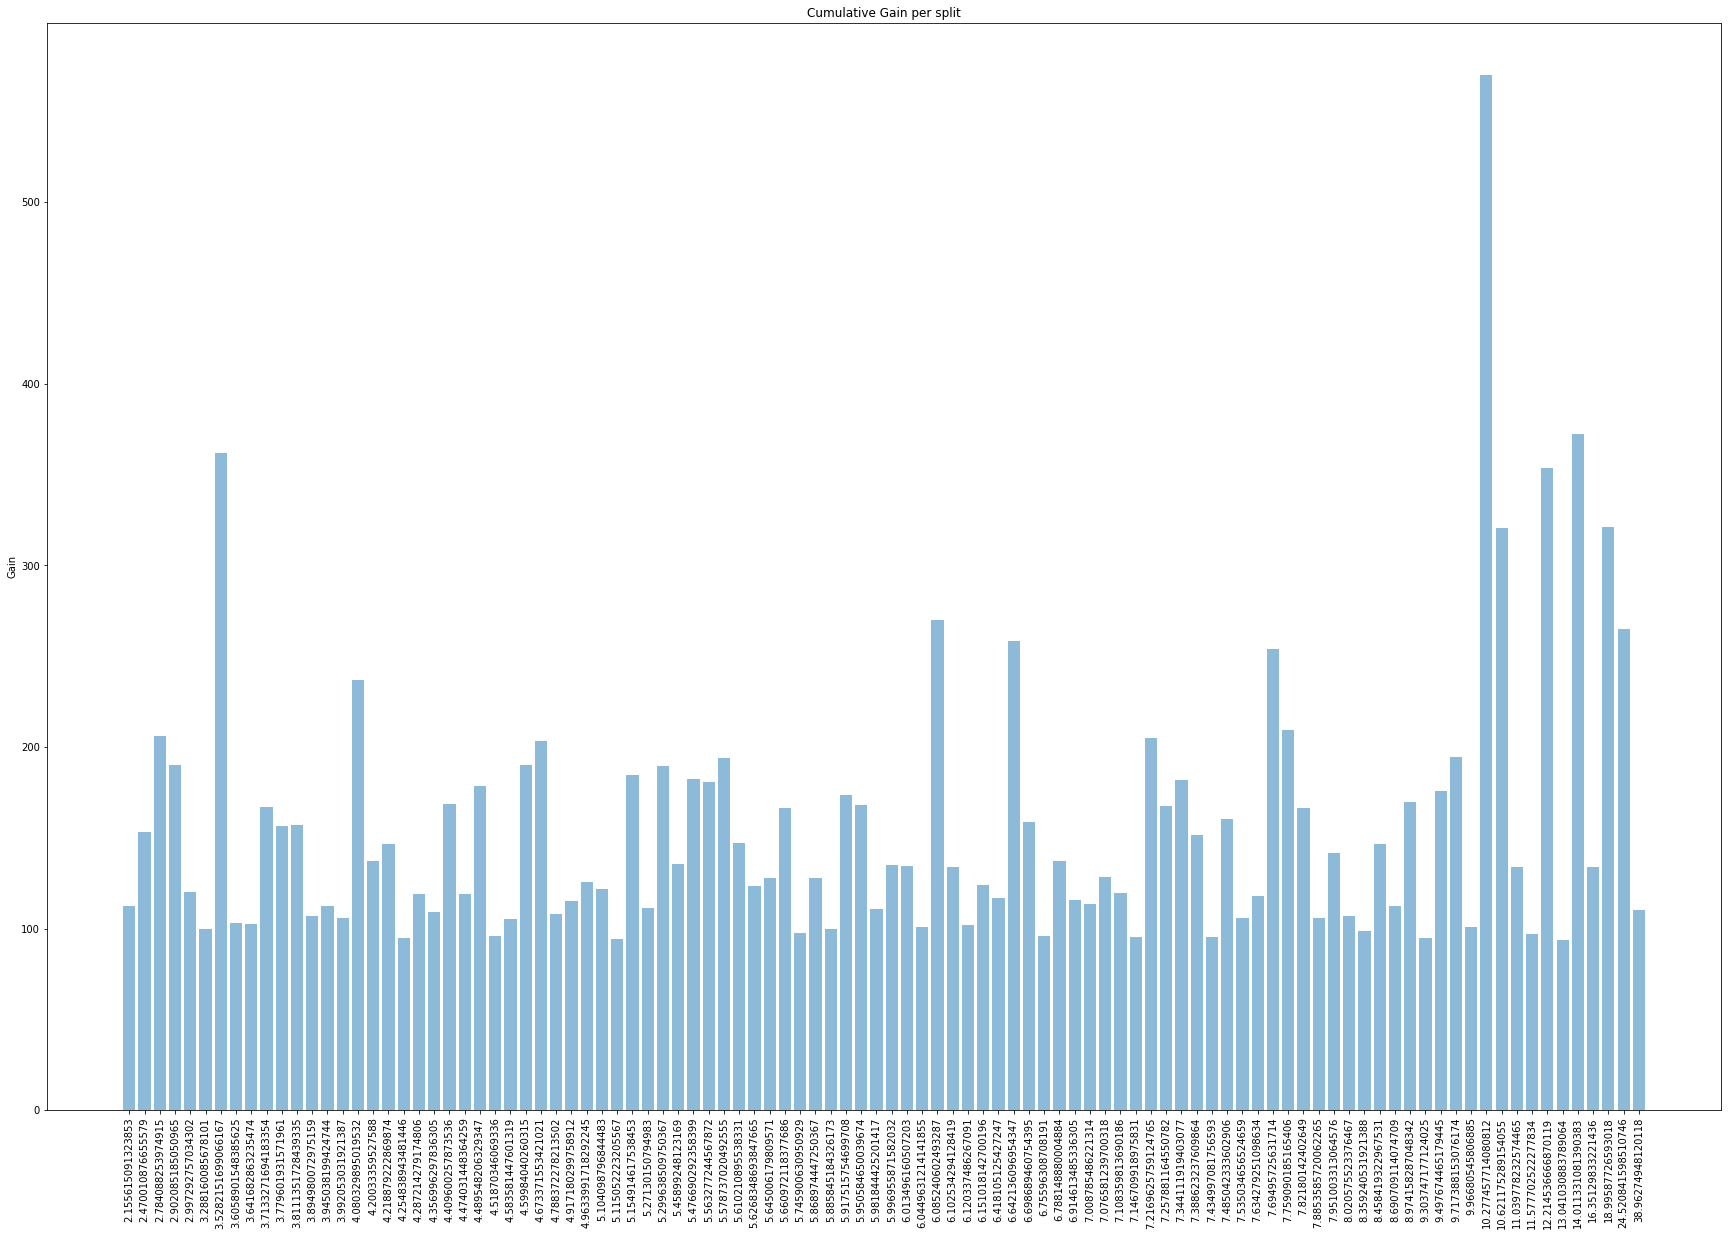

In [67]:
f, ax = plt.subplots(figsize=(30,20))
plt.bar(np.arange(len(data.value)), data.gain, align='center', alpha=0.5)
plt.xticks(np.arange(len(data.value)), data.value, rotation='vertical')
plt.ylabel('Gain')
plt.title('Cumulative Gain per split')
plt.show()